# Part 1：EDA & Visualization

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd 
df=pd.read_csv('/content/gdrive/MyDrive/clean_imdb.csv')

In [61]:
import seaborn as sns
import matplotlib as plt

In [4]:
import numpy as np

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 4932 non-null   int64  
 1   director_name              4932 non-null   object 
 2   num_critic_for_reviews     4932 non-null   float64
 3   duration                   4932 non-null   float64
 4   director_facebook_likes    4932 non-null   float64
 5   actor_3_facebook_likes     4932 non-null   float64
 6   actor_2_name               4922 non-null   object 
 7   actor_1_facebook_likes     4932 non-null   float64
 8   gross                      4932 non-null   float64
 9   genres                     4932 non-null   object 
 10  actor_1_name               4925 non-null   object 
 11  movie_title                4932 non-null   object 
 12  num_voted_users            4932 non-null   int64  
 13  cast_total_facebook_likes  4932 non-null   int64

In [6]:
# drop Unnamed: 0
df = df.drop("Unnamed: 0", axis = 1)

In [7]:
# REVISION!!!
# In a later query about top 10 most expensive movies, we found that non-english movies need to be removed! 
df = df.loc[df["language"]== 'English']

In [8]:
# as well as this one bollywood movie that released in both english and hindi
df = df.loc[~df["movie_title"].str.contains('Kites')]

In [9]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre,year
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",CCH Pounder,Avatar,886204,4834,Wes Studi,"['avatar', 'future', 'marine', 'native', 'para...",http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237.0,2009,936.0,7.9,33000,Action,2009.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.0,"['Action', 'Adventure', 'Fantasy']",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,"['goddess', 'marriage ceremony', 'marriage pro...",http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300.0,2007,5000.0,7.1,0,Action,2007.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.0,"['Action', 'Adventure', 'Thriller']",Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,"['bomb', 'espionage', 'sequel', 'spy', 'terror...",http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245.0,2015,393.0,6.8,85000,Action,2015.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.0,"['Action', 'Thriller']",Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,"['deception', 'imprisonment', 'lawlessness', '...",http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250.0,2012,23000.0,8.5,164000,Action,2012.0
4,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73.0,"['Action', 'Adventure', 'Sci-Fi']",Daryl Sabara,John Carter,212204,1873,Polly Walker,"['alien', 'american civil war', 'male nipple',...",http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263.0,2012,632.0,6.6,24000,Action,2012.0


In [10]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,year
count,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.00000,4.603000e+03,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000
mean,145.524054,107.800911,714.857484,691.348786,7024.391798,49.67308,8.827469e+04,10399.884858,286.423218,34.202276,2002.356289,1783.475031,6.374082,7877.853139,2002.356289
std,122.327045,21.970793,2886.869352,1730.434182,15131.577484,64.97751,1.425266e+05,18439.859915,385.949710,40.962220,12.317805,4200.750090,1.111607,19964.966466,12.317805
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.00000,5.000000e+00,0.000000,1.000000,0.000000,1929.000000,0.000000,1.600000,0.000000,1929.000000
25%,56.000000,94.000000,7.000000,168.500000,682.000000,10.00000,9.964000e+03,1652.000000,74.000000,7.000000,1999.000000,333.500000,5.800000,0.000000,1999.000000
50%,117.000000,103.000000,51.000000,401.000000,1000.000000,31.00000,3.795200e+04,3408.000000,168.000000,22.000000,2005.000000,636.000000,6.500000,175.000000,2005.000000
75%,198.000000,118.000000,207.000000,653.500000,12000.000000,66.00000,1.028040e+05,14747.000000,343.500000,44.000000,2011.000000,943.500000,7.100000,5000.000000,2011.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,760.00000,1.689764e+06,656730.000000,5060.000000,390.000000,2016.000000,137000.000000,9.300000,349000.000000,2016.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4603 entries, 0 to 4931
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4603 non-null   object 
 1   num_critic_for_reviews     4603 non-null   float64
 2   duration                   4603 non-null   float64
 3   director_facebook_likes    4603 non-null   float64
 4   actor_3_facebook_likes     4603 non-null   float64
 5   actor_2_name               4595 non-null   object 
 6   actor_1_facebook_likes     4603 non-null   float64
 7   gross                      4603 non-null   float64
 8   genres                     4603 non-null   object 
 9   actor_1_name               4597 non-null   object 
 10  movie_title                4603 non-null   object 
 11  num_voted_users            4603 non-null   int64  
 12  cast_total_facebook_likes  4603 non-null   int64  
 13  actor_3_name               4587 non-null   objec

In [ ]:
# write this df to file again
# since we made changes again in this notebook
df.to_csv('clean_imdb_2.csv')
!cp clean_imdb_2.csv "drive/My Drive/"

cp: cannot create regular file 'drive/My Drive/': No such file or directory


## Top 10 movies by highest budget

NOTE: Before non-english & Kites were deleted from df, in the first run of this query on the original df, almost all of the top 10 most expensive movies made no sense. Upon research, their budget was recorded in a non-USD currency. For example, The Host (most expensive in that query) is a Korean movie, and the budget is in KRW, which resulted in the crazy number.

* below in comment mode is the original code run to discover the details of such problem. They are kept in comment to avoid confusion 

* I moved the process of removing unqualified titles from the original df in the beginning of the notebook, right after the original data is read from google drive.

In [ ]:
# non_eng_languages = df["language"] != "English"
# df[non_eng_languages].head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre,year,score_bin
97,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,75.864975,"['Action', 'Adventure', 'Drama', 'Horror', 'Sc...",Mark Chinnery,Godzilla Resurgence,374,699,Atsuko Maeda,"['blood', 'godzilla', 'monster', 'sequel']",http://www.imdb.com/title/tt4262980/?ref_=fn_t...,13.0,Japanese,Japan,NaN,64.435059,2016,106.0,8.2,0,Action,2016.0,high
202,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,75.864975,"['Action', 'Adventure', 'Drama', 'Horror', 'Sc...",Mark Chinnery,Godzilla Resurgence,374,699,Atsuko Maeda,"['blood', 'godzilla', 'monster', 'sequel']",http://www.imdb.com/title/tt4262980/?ref_=fn_t...,13.0,Japanese,Japan,NaN,64.435059,2016,106.0,8.2,0,Action,2016.0,high
240,Frédéric Forestier,33.0,116.0,0.0,141.0,Santiago Segura,936.0,85.861183,"['Adventure', 'Comedy', 'Family', 'Fantasy']",Alain Delon,Asterix at the Olympic Games,20567,1609,Vanessa Hessler,"['1st century b.c.', 'lightsaber', 'local bloc...",http://www.imdb.com/title/tt0463872/?ref_=fn_t...,36.0,French,France,NaN,78.000000,2008,276.0,5.1,291,Adventure,2008.0,poor
323,Yimou Zhang,136.0,146.0,611.0,28.0,Ni Ni,23000.0,0.000000,"['Drama', 'History', 'Romance', 'War']",Christian Bale,The Flowers of War,38690,23240,Shigeo Kobayashi,"['abusive stepfather', 'attempted rape', 'food...",http://www.imdb.com/title/tt1410063/?ref_=fn_t...,130.0,Mandarin,China,R,94.000000,2011,196.0,7.6,13000,Drama,2011.0,high
373,Sydney Pollack,227.0,128.0,521.0,249.0,George Harris,591.0,72.000000,"['Crime', 'Mystery', 'Thriller']",Curtiss Cook,The Interpreter,86152,2100,Michael Wright,"['african', 'assassination', 'dialect', 'inter...",http://www.imdb.com/title/tt0373926/?ref_=fn_t...,411.0,Aboriginal,UK,PG-13,80.000000,2005,249.0,6.4,0,Crime,2005.0,okay


In [ ]:
# len(df.loc[df['language'] != 'English'])

328

In [ ]:
# df.loc[df["movie_title"].str.contains('Kites')]
# CHECKPOINT: Kites became the most expensive movie made after removing non-eng movies
# upon research, it has to be removed
# this is a Bollywood movie that is in English & Hindi, and currency non USD
# this will be done at the beginning of the notebook too

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre,year,score_bin
3208,Anurag Basu,41.0,90.0,116.0,303.0,Steven Michael Quezada,594.0,1.0,"['Action', 'Drama', 'Romance', 'Thriller']",Bárbara Mori,Kites,9673,1836,Kabir Bedi,"['casino', 'desert', 'love', 'suicide', 'tragi...",http://www.imdb.com/title/tt1198101/?ref_=fn_t...,106.0,English,India,NaN,600.0,2010,412.0,6.0,0,Action,2010.0,poor


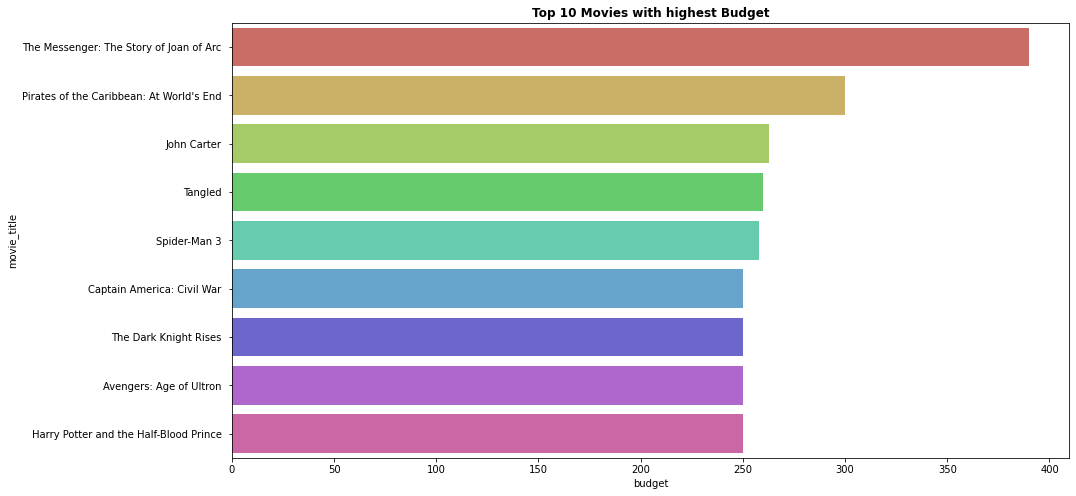

In [ ]:
top_budget = df1.sort_values(['budget'], ascending = False)
fig,axs=plt.subplots(figsize=(15, 8))
g=sns.barplot(y=top_budget['movie_title'][:10],x=top_budget['budget'][:10], palette = 'hls')
g.set_title("Top 10 Movies with highest Budget", weight = "bold")
plt.show()

## Top 10 movies by highest gross

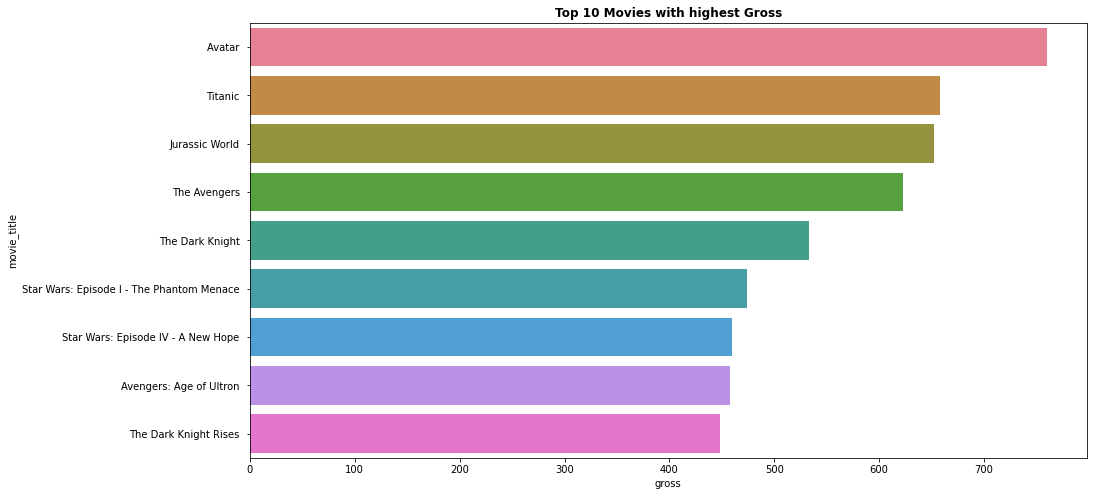

In [ ]:
top_gross = df1.sort_values(['gross'], ascending = False)
fig,axs=plt.subplots(figsize=(15, 8))
g=sns.barplot(y=top_gross['movie_title'][:10],x=top_gross['gross'][:10], palette = 'husl')
g.set_title("Top 10 Movies with highest Gross", weight = "bold")
plt.show()

## A close up look at genre:

* from the last notebook (Preprocessing) we assumed that the first genre that each movies is tagged with, is "the strongest genre" it definitely belongs to.

* A column has been created, called "first_genre"

### Count of movies, Mean imdb scores and mode scores by genre

In [16]:
# deep copy df
df1 = df.copy()

In [20]:
count_by_genre = df1.groupby("first_genre").size().sort_values(ascending=False)

In [21]:
count_by_genre

first_genre
Comedy         1232
Action         1065
Drama           839
Adventure       422
Crime           310
Biography       240
Horror          224
Documentary      73
Fantasy          51
Animation        50
Mystery          32
Thriller         21
Sci-Fi           13
Western          11
Family           11
Romance           5
Musical           4
dtype: int64

Text(0.5, 1.0, 'Num of movies by genre')

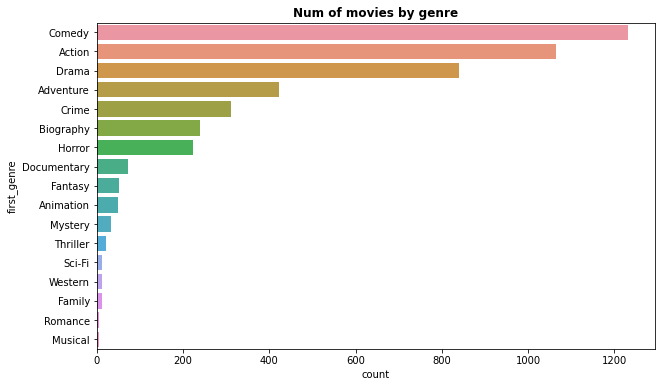

In [ ]:
fig,axs=plt.subplots(figsize=(10, 6))
sns.countplot(y = 'first_genre',
              data = df1,
              order = df1['first_genre'].value_counts().index).set_title("Num of movies by genre", weight = "bold")

In [22]:
avg_score_by_genre = df1.groupby("first_genre")["imdb_score"].mean().sort_values(ascending = False)

In [23]:
avg_score_by_genre

first_genre
Biography      7.148333
Documentary    7.100000
Crime          6.810323
Drama          6.687128
Mystery        6.562500
Animation      6.530000
Adventure      6.499052
Fantasy        6.419608
Western        6.372727
Action         6.183474
Comedy         6.125731
Musical        6.000000
Sci-Fi         6.000000
Romance        5.740000
Family         5.709091
Horror         5.641518
Thriller       5.628571
Name: imdb_score, dtype: float64

now we should combine the last two queries together to see count of movies and mean score across the genres

In [54]:
score_ct_avg_mode = df1.groupby("first_genre")["imdb_score"].agg(
    [np.size, np.mean, pd.Series.mode]).rename(
        columns = {'size':'count', 'mean':'mean_', 'mode': 'mode_'})

In [55]:
score_ct_avg_mode = score_ct_avg_mode.sort_values('count', ascending = False)

In [66]:
score_ct_avg_mode

,count,mean_,mode_
first_genre,,,
Comedy,1232.0,6.125731,6.4
Action,1065.0,6.183474,6.1
Drama,839.0,6.687128,6.7
Adventure,422.0,6.499052,"[6.7, 7.3]"
Crime,310.0,6.810323,"[7.2, 7.3, 7.4]"
Biography,240.0,7.148333,7
Horror,224.0,5.641518,5.9
Documentary,73.0,7.100000,7.5
Fantasy,51.0,6.419608,"[6.8, 7.4]"


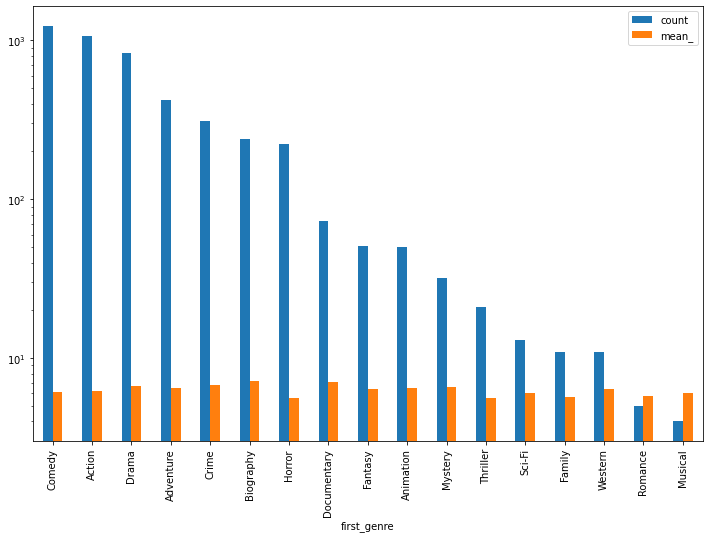

In [65]:
score_ct_avg_mode.plot.bar(logy = True, figsize = (12, 8))

Above bar chart shows genres sorted by count of movies, compared to the mean imdb score

### Top 10 Genres with the highest mean gross

In [70]:
gross_ = df1.groupby("first_genre")["gross"].mean().reset_index()
gross_10 = gross_.sort_values("gross", ascending = False)[:10]

In [71]:
gross_10

,first_genre,gross
8,Family,148.666667
2,Animation,93.108000
1,Adventure,88.678523
0,Action,78.668786
11,Musical,61.000000
12,Mystery,48.250000
9,Fantasy,38.795098
4,Comedy,36.324399
3,Biography,35.794833
10,Horror,35.159332


Text(0.5, 1.0, 'Top 10 Genres with the highest mean gross')

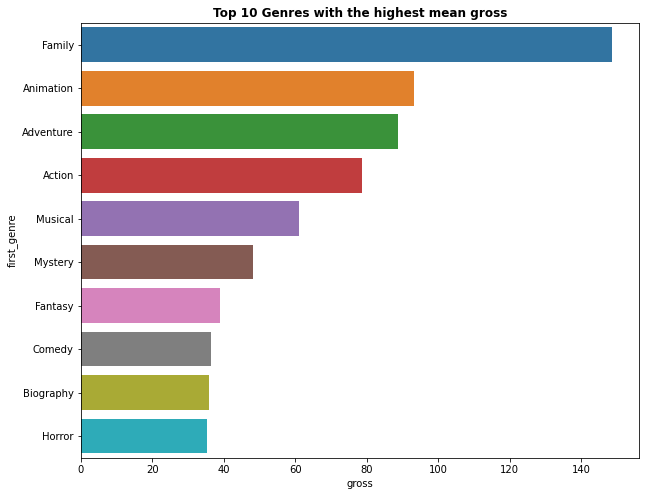

In [ ]:
fig,axs=plt.subplots(figsize=(10, 8))
sns.barplot(y = 'first_genre', x = 'gross', data=gross_10).set_title("Top 10 Genres with the highest mean gross", weight = "bold")

### Top 10 Genres with the highest mean budget

In [ ]:
budget_ = df1.groupby("first_genre")["budget"].mean().reset_index()
budget_10 = budget_.sort_values("budget", ascending = False)[:10]

In [ ]:
budget_10

,first_genre,budget
0,Action,61.131870
1,Adventure,61.041516
2,Animation,55.290588
12,Mystery,26.784180
5,Crime,24.710002
3,Biography,24.701985
13,Romance,24.000000
4,Comedy,21.888675
7,Drama,21.675574
14,Sci-Fi,17.076923


Text(0.5, 1.0, 'Top 10 Genres with the highest mean budget')

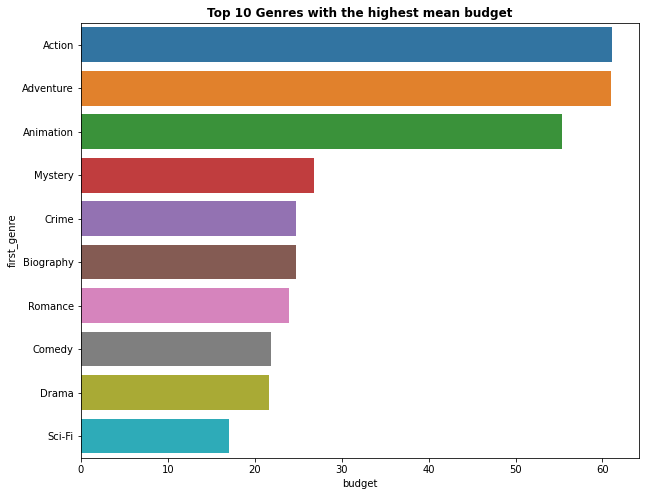

In [ ]:
fig,axs=plt.subplots(figsize=(10, 8))
sns.barplot(y = 'first_genre', x = 'budget', data=budget_10).set_title("Top 10 Genres with the highest mean budget", weight = "bold")

## Top 10 Most voted movies

In [79]:
top_voted = df1.sort_values(['num_voted_users'], ascending = False)[:10]

In [89]:
top_voted

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,first_genre,year
1900,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28.0,"['Crime', 'Drama']",Morgan Freeman,The Shawshank Redemption,1689764,13495,Bob Gunton,"['escape from prison', 'first person narration...",http://www.imdb.com/title/tt0111161/?ref_=fn_t...,4144.0,English,USA,R,25.0,1994,745.0,9.3,108000,Crime,1994.0
65,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533.0,"['Action', 'Crime', 'Drama', 'Thriller']",Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,"['based on comic book', 'dc comics', 'psychopa...",http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185.0,2008,13000.0,9.0,37000,Action,2008.0
96,Christopher Nolan,642.0,148.0,22000.0,23000.0,Tom Hardy,29000.0,292.0,"['Action', 'Adventure', 'Sci-Fi', 'Thriller']",Leonardo DiCaprio,Inception,1468200,81115,Joseph Gordon-Levitt,"['ambiguous ending', 'corporate espionage', 'd...",http://www.imdb.com/title/tt1375666/?ref_=fn_t...,2803.0,English,USA,PG-13,160.0,2010,27000.0,8.8,175000,Action,2010.0
672,David Fincher,315.0,151.0,21000.0,637.0,Meat Loaf,11000.0,37.0,['Drama'],Brad Pitt,Fight Club,1347461,13209,Eugenie Bondurant,"['anti establishment', 'dark humor', 'fighting...",http://www.imdb.com/title/tt0137523/?ref_=fn_t...,2968.0,English,USA,R,63.0,1999,783.0,8.8,48000,Drama,1999.0
3288,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107.0,"['Crime', 'Drama']",Bruce Willis,Pulp Fiction,1324680,16557,Phil LaMarr,"['black comedy', 'cunnilingus', 'neo noir', 'n...",http://www.imdb.com/title/tt0110912/?ref_=fn_t...,2195.0,English,USA,R,8.0,1994,902.0,8.9,45000,Crime,1994.0
820,Robert Zemeckis,149.0,142.0,0.0,194.0,Siobhan Fallon Hogan,15000.0,329.0,"['Comedy', 'Drama']",Tom Hanks,Forrest Gump,1251222,15700,Sam Anderson,"['amputee', 'love', 'vietnam', 'vietnam war', ...",http://www.imdb.com/title/tt0109830/?ref_=fn_t...,1398.0,English,USA,PG-13,55.0,1994,294.0,8.8,59000,Comedy,1994.0
267,Peter Jackson,297.0,171.0,0.0,857.0,Orlando Bloom,16000.0,313.0,"['Action', 'Adventure', 'Drama', 'Fantasy']",Christopher Lee,The Lord of the Rings: The Fellowship of the R...,1238746,22342,Billy Boyd,"['elf', 'hobbit', 'middle earth', 'quest', 'ri...",http://www.imdb.com/title/tt0120737/?ref_=fn_t...,5060.0,English,New Zealand,PG-13,93.0,2001,5000.0,8.8,21000,Action,2001.0
643,Lana Wachowski,313.0,136.0,0.0,99.0,Marcus Chong,18000.0,171.0,"['Action', 'Sci-Fi']",Keanu Reeves,The Matrix,1217752,18563,Gloria Foster,"['artificial reality', 'computer', 'matrix', '...",http://www.imdb.com/title/tt0133093/?ref_=fn_t...,3646.0,English,USA,R,63.0,1999,145.0,8.7,25000,Action,1999.0
335,Peter Jackson,328.0,192.0,0.0,416.0,Billy Boyd,5000.0,377.0,"['Action', 'Adventure', 'Drama', 'Fantasy']",Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,6434,Bernard Hill,"['battle', 'epic', 'king', 'orc', 'ring']",http://www.imdb.com/title/tt0167260/?ref_=fn_t...,3189.0,English,USA,PG-13,94.0,2003,857.0,8.9,16000,Action,2003.0
3396,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134.0,"['Crime', 'Drama']",Al Pacino,The Godfather,1155770,28122,Robert Duvall,"['crime family', 'mafia', 'organized crime', '...",http://www.imdb.com/title/tt0068646/?ref_=fn_t...,2238.0,English,USA,R,6.0,1972,10000.0,9.2,43000,Crime,1972.0


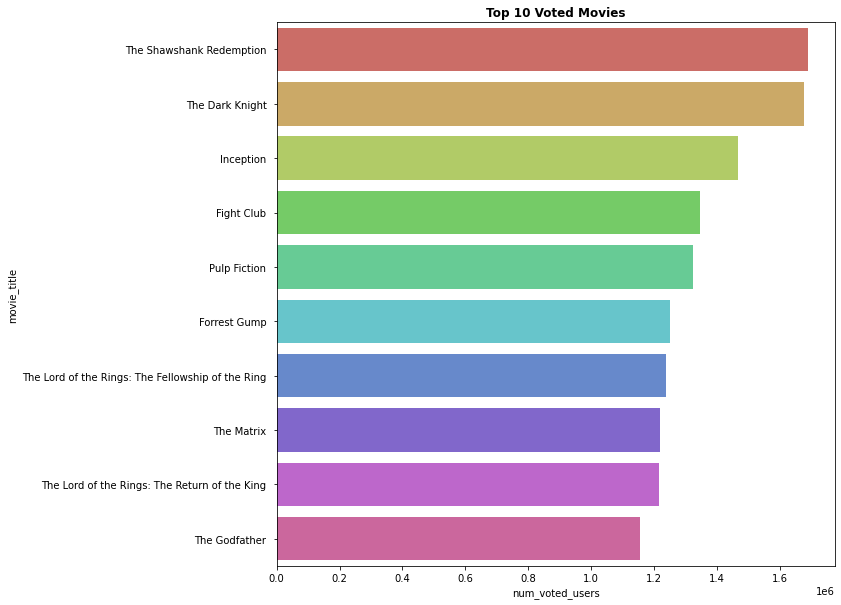

In [88]:
import matplotlib.pyplot as plt 
fig,axs=plt.subplots(figsize=(10, 10))
g=sns.barplot(y=top_voted['movie_title'],x=top_voted['num_voted_users'],
              order = top_voted.sort_values('num_voted_users', ascending= False).movie_title,
              palette = 'hls')
g.set_title("Top 10 Voted Movies", weight = "bold")
plt.show()

Are we surprised at the top 10 voted piece? Not really.

## Top 10 most voted films vs their imdb scores

In [91]:
top_voted[["movie_title", "num_voted_users","imdb_score"]]

,movie_title,num_voted_users,imdb_score
1900,The Shawshank Redemption,1689764,9.3
65,The Dark Knight,1676169,9.0
96,Inception,1468200,8.8
672,Fight Club,1347461,8.8
3288,Pulp Fiction,1324680,8.9
820,Forrest Gump,1251222,8.8
267,The Lord of the Rings: The Fellowship of the R...,1238746,8.8
643,The Matrix,1217752,8.7
335,The Lord of the Rings: The Return of the King,1215718,8.9
3396,The Godfather,1155770,9.2


## How many movies are in each rating bucket?
* horrible = 0 - 4
* poor = 4.1 - 6
* okay = 6.1 - 7.5
* high = 7.6 - 8.5
* amazing = 8.6 - 10

In [92]:
df1['score_bin'] = pd.cut(df1.imdb_score, [0, 4, 6, 7.5, 8.5, 10],
                              labels=['horrible', 'poor', 'okay', 'high', 'amazing'], right = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Num of movies in each rating bucket')

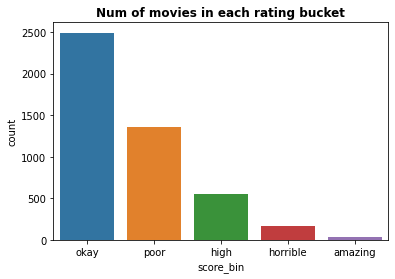

In [103]:
fig,axs=plt.subplots(figsize=(6, 4))
sns.countplot('score_bin', data=df1, order = df1['score_bin'].value_counts().index).set_title("Num of movies in each rating bucket", weight = "bold")

## Avg number of users voted by score bin

In [107]:
avg_vote_by_bin = df1.groupby("score_bin")["num_voted_users"].mean().sort_values(ascending = False).reset_index()

In [108]:
avg_vote_by_bin

,score_bin,num_voted_users
0,amazing,819267.125000
1,high,243159.619134
2,okay,78556.602327
3,poor,34729.221239
4,horrible,15062.396450


Text(0.5, 1.0, 'Avg num of voted users by score bin')

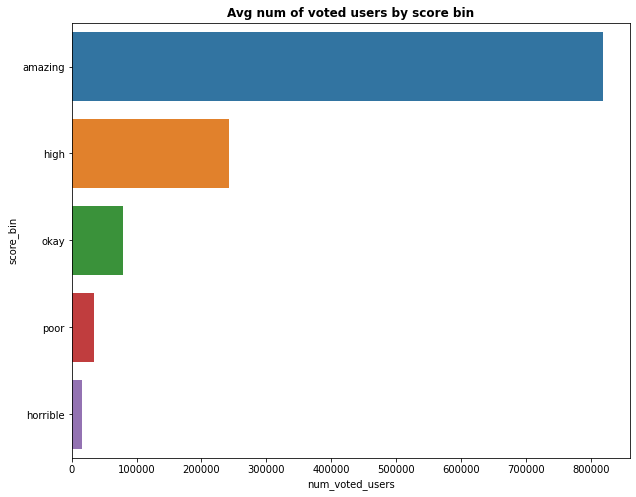

In [110]:
fig,axs=plt.subplots(figsize=(10, 8))
sns.barplot(y = 'score_bin', x = 'num_voted_users', data=avg_vote_by_bin, 
            order =avg_vote_by_bin.sort_values('num_voted_users', ascending= False).score_bin ).set_title("Avg num of voted users by score bin", weight = "bold")

## Top 10 directors by number of films

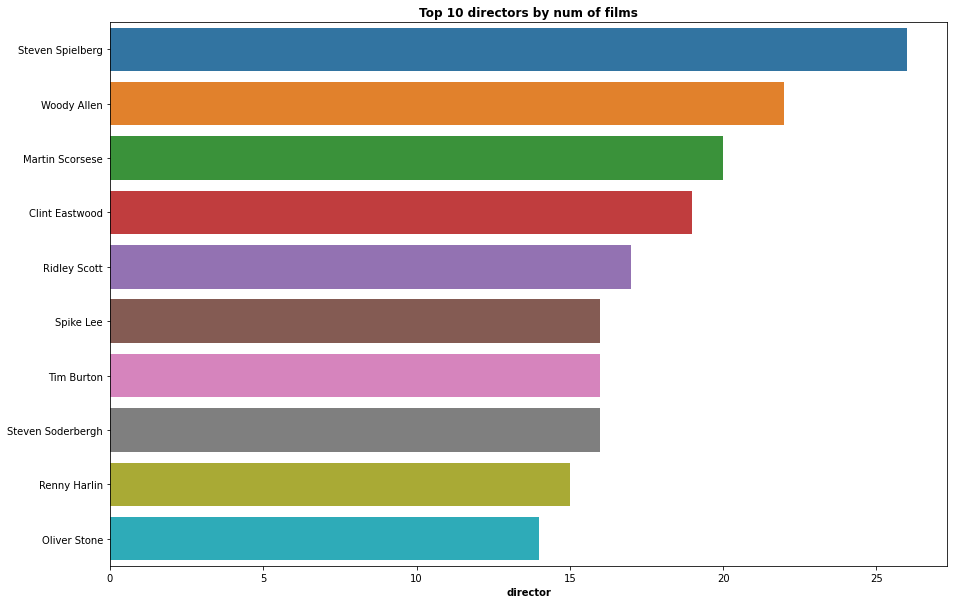

In [124]:
fig,axs=plt.subplots(figsize=(15,10))
g=sns.barplot(x=df1['director_name'].value_counts()[:10],y=df1['director_name'].value_counts()[:10].index)
g.set_title("Top 10 directors by num of films", weight = "bold")
g.set_xlabel("director", weight = "bold")
plt.show()

In [ ]:
#temp = df1[["director_name", "imdb_score"]]
group_by_dir = df1.groupby('director_name', sort=True)


In [ ]:
group_by_dir.size().sort_values(ascending = False)[:10]

director_name
Steven Spielberg     26
Woody Allen          22
Martin Scorsese      20
Clint Eastwood       19
Ridley Scott         17
Steven Soderbergh    16
Spike Lee            16
Tim Burton           16
Renny Harlin         15
Oliver Stone         14
dtype: int64

## Top 10 directors by mean imdb score

In [ ]:
avg_score_top_dir = group_by_dir.agg(mean_score = ("imdb_score",np.mean)).mean_score.sort_values(ascending = False)[:10]

In [ ]:
score_dir_df = avg_score_top_dir.to_frame().reset_index()


In [ ]:
score_dir_df

,director_name,mean_score
0,Mitchell Altieri,8.700
1,Cary Bell,8.700
2,Sadyk Sher-Niyaz,8.700
3,Charles Chaplin,8.600
4,Mike Mayhall,8.600
5,Damien Chazelle,8.500
6,Sergio Leone,8.500
7,Christopher Nolan,8.425
8,Moustapha Akkad,8.400
9,Jay Oliva,8.400


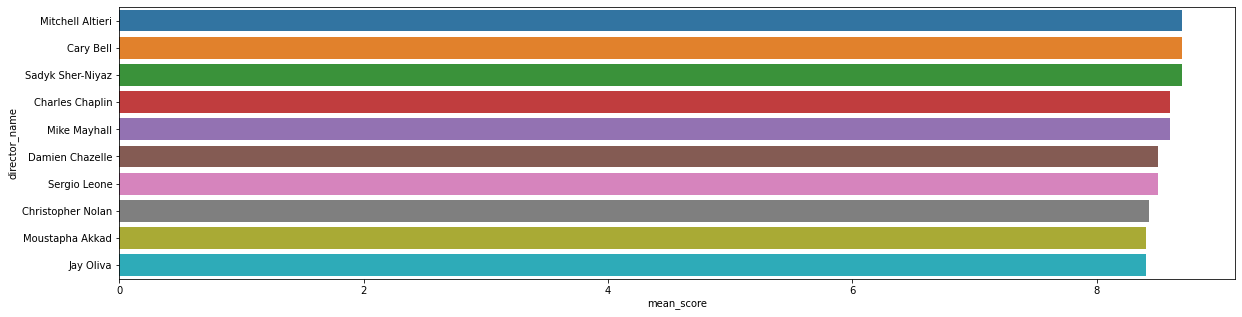

In [ ]:
fig,axs=plt.subplots(figsize=(20,5))
sns.barplot(y='director_name',x="mean_score", data = score_dir_df)
g.set_title("Top 10 directors by mean imdb score", weight = "bold")
g.set_ylabel("director", weight = "bold")
plt.show()

## Avg score for top 10 directors by count

In [130]:
top_10_dir = df1.groupby("director_name").size().sort_values(ascending = False)[:10].index.to_list()

In [131]:
top_10_dir

['Steven Spielberg',
 'Woody Allen',
 'Martin Scorsese',
 'Clint Eastwood',
 'Ridley Scott',
 'Steven Soderbergh',
 'Spike Lee',
 'Tim Burton',
 'Renny Harlin',
 'Oliver Stone']

In [133]:
# subset of movies shot by these directors above 
movies_by_top_dir = df1[df1['director_name'].isin(top_10_dir)]

In [136]:
# subset of only the director names and imdb scores
movies_by_top_dir_ = movies_by_top_dir[['director_name', 'imdb_score']]

In [137]:
movies_by_top_dir_.groupby('director_name').mean()

,imdb_score
director_name,
Clint Eastwood,7.189474
Martin Scorsese,7.660000
Oliver Stone,6.950000
Renny Harlin,5.746667
Ridley Scott,7.070588
Spike Lee,6.568750
Steven Soderbergh,6.706250
Steven Spielberg,7.480769
Tim Burton,6.931250


recall our score bins, we can see that for the directors with the most films, the mean score generally falls in the okay range, with one exception - Renny Harlin lands in the poor range.
* horrible = 0 - 4
* poor = 4.1 - 6
* okay = 6.1 - 7.5
* high = 7.6 - 8.5
* amazing = 8.6 - 10

A list of all the movies Renny Harlin directed in this dataset and their imdb scores as of 2016.

In [138]:
q = df1[['director_name', 'movie_title', 'imdb_score']]

In [139]:
q.loc[q['director_name'] == 'Renny Harlin']

,director_name,movie_title,imdb_score
346,Renny Harlin,Cutthroat Island,5.6
525,Renny Harlin,Exorcist: The Beginning,5.1
568,Renny Harlin,Driven,4.5
582,Renny Harlin,Die Hard 2,7.1
619,Renny Harlin,The Legend of Hercules,4.2
654,Renny Harlin,Cliffhanger,6.4
669,Renny Harlin,The Long Kiss Goodnight,6.7
728,Renny Harlin,Deep Blue Sea,5.8
1014,Renny Harlin,The Adventures of Ford Fairlane,6.3
1792,Renny Harlin,Mindhunters,6.4
